In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
train=pd.read_csv('bigmart_train.csv')
test=pd.read_csv('bigmart_test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
train['outlet_age']=2018-train['Outlet_Establishment_Year']

In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [10]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [12]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
train['Outlet_Size'].mode()[0]

'Medium'

In [14]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [15]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

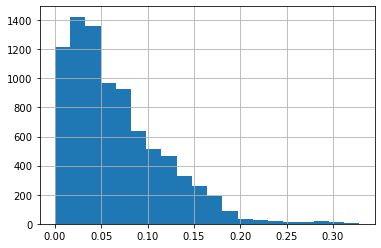

In [16]:
train['Item_Visibility'].hist(bins=20)

In [17]:
import seaborn as sns

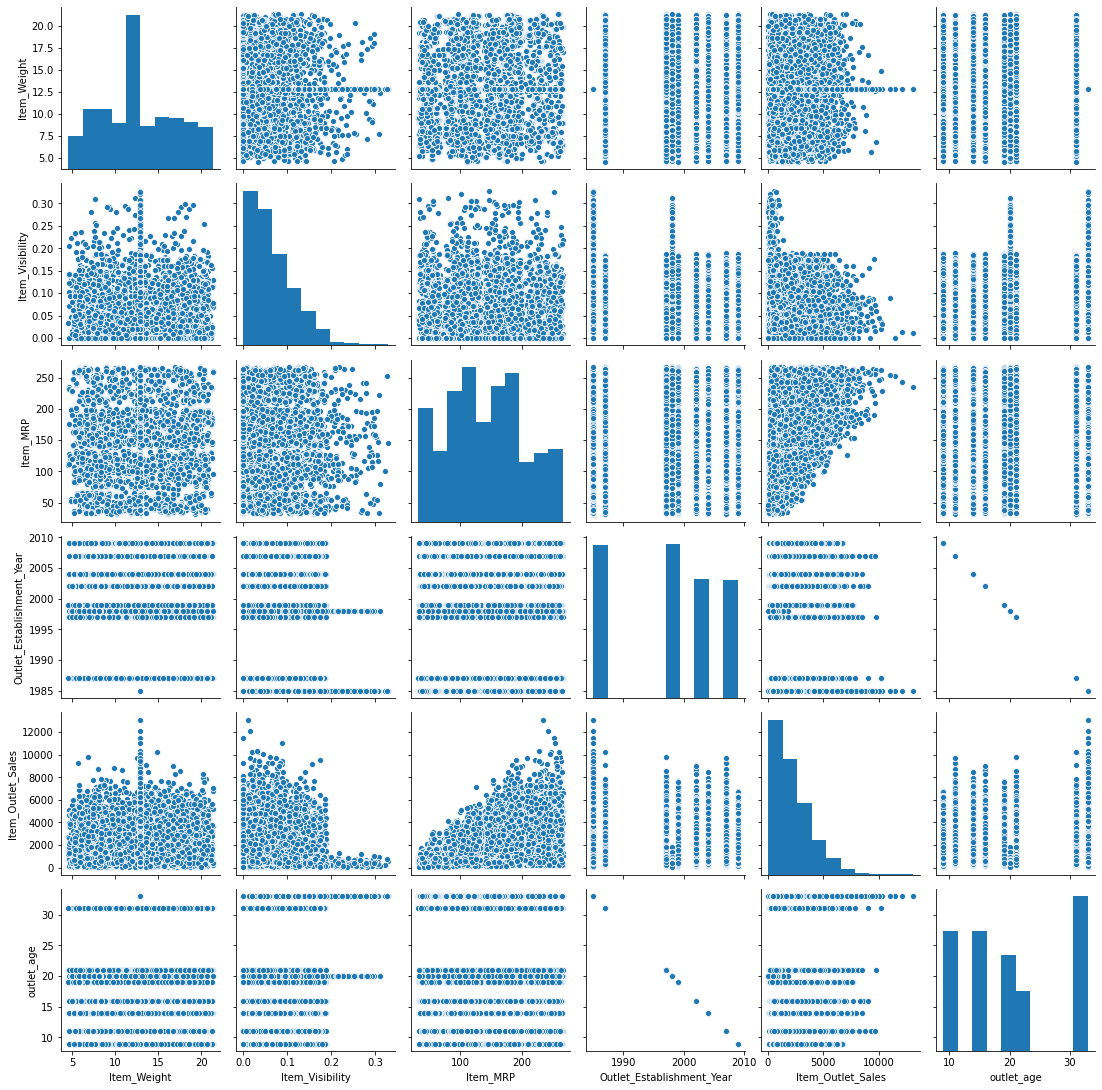

In [18]:
sns.pairplot(train)

In [19]:
q1=train['Item_Visibility'].quantile(0.25)
q3=train['Item_Visibility'].quantile(0.75)
iqr=q3-q1
filt_train=train.query('(@q1-1.5*@iqr)<= Item_Visibility<=(@q3+1.5*@iqr)')
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9


In [20]:
filt_train.shape,train.shape

((8379, 13), (8523, 13))

In [21]:
train=filt_train

In [22]:
train.shape

(8379, 13)

In [23]:
train['Item_Visibility_Bins']=pd.cut(train['Item_Visibility'],[0.000,0.065,0.15,0.2],labels=['Low Viz','Viz','High Viz'])

<ipython-input-23-984e4821ea6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_Bins']=pd.cut(train['Item_Visibility'],[0.000,0.065,0.15,0.2],labels=['Low Viz','Viz','High Viz'])


In [24]:
train['Item_Visibility_Bins'].value_counts()

Low Viz     4403
Viz         2944
High Viz     506
Name: Item_Visibility_Bins, dtype: int64

In [25]:
train['Item_Visibility_Bins']=train['Item_Visibility_Bins'].replace(np.nan,'Low Viz')

<ipython-input-25-bbe272e4d910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_Bins']=train['Item_Visibility_Bins'].replace(np.nan,'Low Viz')


In [26]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')

<ipython-input-26-412d384fdd27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
<ipython-input-26-412d384fdd27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')


In [27]:
train['Item_Fat_Content'].value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [28]:
le=LabelEncoder()

In [29]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [30]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age,Item_Visibility_Bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN


In [31]:
train['Item_Visibility_Bins']=train['Item_Visibility_Bins'].fillna('Low Viz')


<ipython-input-31-9e86dd8e0c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_Bins']=train['Item_Visibility_Bins'].fillna('Low Viz')


In [32]:
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])

<ipython-input-32-340c77edd03e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])


In [33]:
train['Item_Visibility_Bins']=le.fit_transform(train['Item_Visibility_Bins'])

<ipython-input-33-39c54eab66a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Visibility_Bins']=le.fit_transform(train['Item_Visibility_Bins'])


In [34]:
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])

<ipython-input-34-56ba6286dd58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])


In [35]:
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])

<ipython-input-35-8701fb90c339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])


In [36]:
dummy=pd.get_dummies(train['Outlet_Type'])

In [37]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [38]:
train=pd.concat([train,dummy],axis=1)

In [39]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [40]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'outlet_age', 'Item_Visibility_Bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [41]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_age,Item_Visibility_Bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,1,0,1,0,0


In [42]:
x=train.drop('Item_Outlet_Sales',axis=1)

In [43]:
y=train.Item_Outlet_Sales

In [44]:
test['outlet_age']=2018-test['Outlet_Establishment_Year']

In [45]:
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [46]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [47]:
test['Item_Visibility_Bins']=pd.cut(test['Item_Visibility'],[0.000,0.065,0.15,0.2],labels=['Low Viz','Viz','High Viz'])

In [48]:
test['Item_Visibility_Bins'].value_counts()

Low Viz     2960
Viz         1964
High Viz     298
Name: Item_Visibility_Bins, dtype: int64

In [49]:
test['Item_Visibility_Bins']=test['Item_Visibility_Bins'].replace(np.nan,'Low Viz')

In [50]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')

In [51]:
test['Item_Visibility_Bins']=test['Item_Visibility_Bins'].fillna('Low Viz')


In [52]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])

In [53]:
test['Item_Visibility_Bins']=le.fit_transform(test['Item_Visibility_Bins'])

In [54]:
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])

In [55]:
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])

In [56]:
dummy=pd.get_dummies(test['Outlet_Type'])
test=pd.concat([test,dummy],axis=1)

In [57]:
x_test=test.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [58]:
x_test.columns , x.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'outlet_age',
        'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'outlet_age',
        'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [61]:
ln=LinearRegression()
ln.fit(x_train,y_train)
print(ln.coef_)
ln.intercept_

[    3.36990944    27.21952124  -239.5349669     15.96620119
    16.79444439     8.02619613    -2.29968359    12.61206847
 -1754.51318137   219.56339605  -122.53782428  1657.48760961]


-186.4808389585619

In [63]:
predictions=ln.predict(x_test)
print(sqrt(mean_squared_error(y_test,predictions)))

1118.3115735373578


In [64]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001,normalize=True)
ridge.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,ridge.predict(x_train))))
print(sqrt(mean_squared_error(y_test,ridge.predict(x_test))))

1139.556680663262
1118.2538035545251


In [65]:
from sklearn.linear_model import Lasso

In [67]:
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print(lassoreg.score(x_test,y_test))

1139.5560211555767
1118.3054566356318
0.5487032704645614


In [68]:
from sklearn.linear_model import ElasticNet
elas=ElasticNet(alpha=0.001,normalize=True)
elas.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,elas.predict(x_train))))
print(sqrt(mean_squared_error(y_test,elas.predict(x_test))))
print(elas.score(x_test,y_test))

1478.2105558506325
1428.964568561182
0.26314129359297833
